# Classification

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import dask.dataframe as dd

In [2]:
import numpy as np
import math

In [16]:
whole_train = dd.read_csv('dataset/train.csv', parse_dates = ['srch_ci', 'srch_co'])
ori_train = whole_train.get_partition(0).head(10000)


In [17]:
ori_train['nights'] = ori_train['srch_co'] - ori_train['srch_ci']
ori_train['nights'] = ori_train['nights'] / np.timedelta64(1, 'D')

In [18]:
for num in range(len(ori_train['nights'])):
    if math.isnan(ori_train['nights'].ix[num]) or ori_train['nights'].ix[num] < 0:
        num1 = num - 1
        num2 = num + 1
        if ori_train.ix[num1]['user_id'] == ori_train.ix[num]['user_id'] and math.isnan(ori_train['nights'].ix[num1]) == False:
            ori_train['nights'].ix[num] = ori_train.ix[num1]['nights']
            print 'Iureka'
        elif ori_train.ix[num2]['user_id'] == ori_train.ix[num]['user_id'] and math.isnan(ori_train['nights'].ix[num2]) == False:
            ori_train['nights'].ix[num] = ori_train.ix[num2]['nights']
            print 'Yureka'
        else :
            break

Iureka
Iureka
Iureka
Yureka
Yureka
Iureka
Iureka
Iureka
Iureka


In [168]:
ori_train.head(1)

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,nights
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,1,8250,1,0,3,2,50,628,1,4.0


In [19]:
train = ori_train

In [123]:
train.head(1)

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,nights
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,1,8250,1,0,3,2,50,628,1,4.0


In [20]:
del train['srch_ci']
del train['srch_co']
del train['date_time']
# del train['Unnamed: 0']

In [8]:
train.columns

Index([u'site_name', u'posa_continent', u'user_location_country',
       u'user_location_region', u'user_location_city',
       u'orig_destination_distance', u'user_id', u'is_mobile', u'is_package',
       u'channel', u'srch_adults_cnt', u'srch_children_cnt', u'srch_rm_cnt',
       u'srch_destination_id', u'srch_destination_type_id', u'is_booking',
       u'cnt', u'hotel_continent', u'hotel_country', u'hotel_market',
       u'hotel_cluster', u'nights'],
      dtype='object')

In [49]:
# del train['site_name']
# del train['user_id']
# del train['orig_destination_distance']
# del train['user_location_city']
# del train['user_location_region']
# del train['user_location_country']
# del train['posa_continent']

# del train['is_package']
# del train['is_mobile']
# del train['channel']

# del train['srch_adults_cnt']
del train['srch_children_cnt']
# del train['srch_rm_cnt']

# del train['srch_destination_id']
# del train['srch_destination_type_id']
# del train['is_booking']
# del train['cnt']

# del train['hotel_continent']
# del train['hotel_country']
# del train['hotel_market']
# del train['nights']

In [50]:
x = train.drop('hotel_cluster', axis = 1)
y = train['hotel_cluster']

In [51]:
print x.columns, len(x.columns)

Index([u'user_location_region', u'user_location_city', u'channel',
       u'srch_adults_cnt', u'srch_destination_id', u'srch_destination_type_id',
       u'cnt', u'hotel_country', u'hotel_market', u'nights'],
      dtype='object') 10


* datetime, ci, co, 물리적 거리 기본 삭제
* 0.12 0.13 0.10 accuracy_score : .1292

* 이후부터는 추가적으로 삭제해 최적의 컬럼 찾기
    * user_id // 0.14 0.14 0.11 // .1373 


In [ ]:
from collections import defaultdict

nights_list = {}

for num in range(len(x)):
    if math.isnan(x.ix[num]):
        continue
    elif x.ix[num] < 0:
        print num
        print train.ix[num]
    elif x.ix[num] in nights_list.keys():
        nights_list[x.ix[num]] += 1
    else :
        nights_list[x.ix[num]] = 1


In [ ]:
nights_list

In [ ]:
import seaborn as sns
sns.countplot(train['nights'])
plt.show()

In [ ]:
len(train)

### Result : There are several target class, Negative

## Using Multiple Class Classification

### OvR (One-vs-the-Rest)
### OvO (One-vs-One)

In [52]:
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.linear_model import LogisticRegression

# model1 = LogisticRegression().fit(x, y)
# model2 = OneVsRestClassifier(LogisticRegression()).fit(x[:,None], y)
model3 = OneVsOneClassifier(LogisticRegression()).fit(x, y)

In [ ]:
ax1 = plt.subplot(211)
pd.DataFrame(model1.decision_function(x[:,None])).plot(ax=ax1)
ax2 = plt.subplot(212)
pd.DataFrame(model1.predict(x[:,None]), columns=['prediction']).plot(ax=ax2)
plt.show()

In [ ]:
ax1 = plt.subplot(211)
pd.DataFrame(model2.decision_function(x[:,None])).plot(ax=ax1)
ax2 = plt.subplot(212)
pd.DataFrame(model2.predict(x[:,None]), columns=['prediction']).plot(ax=ax2)
plt.show()

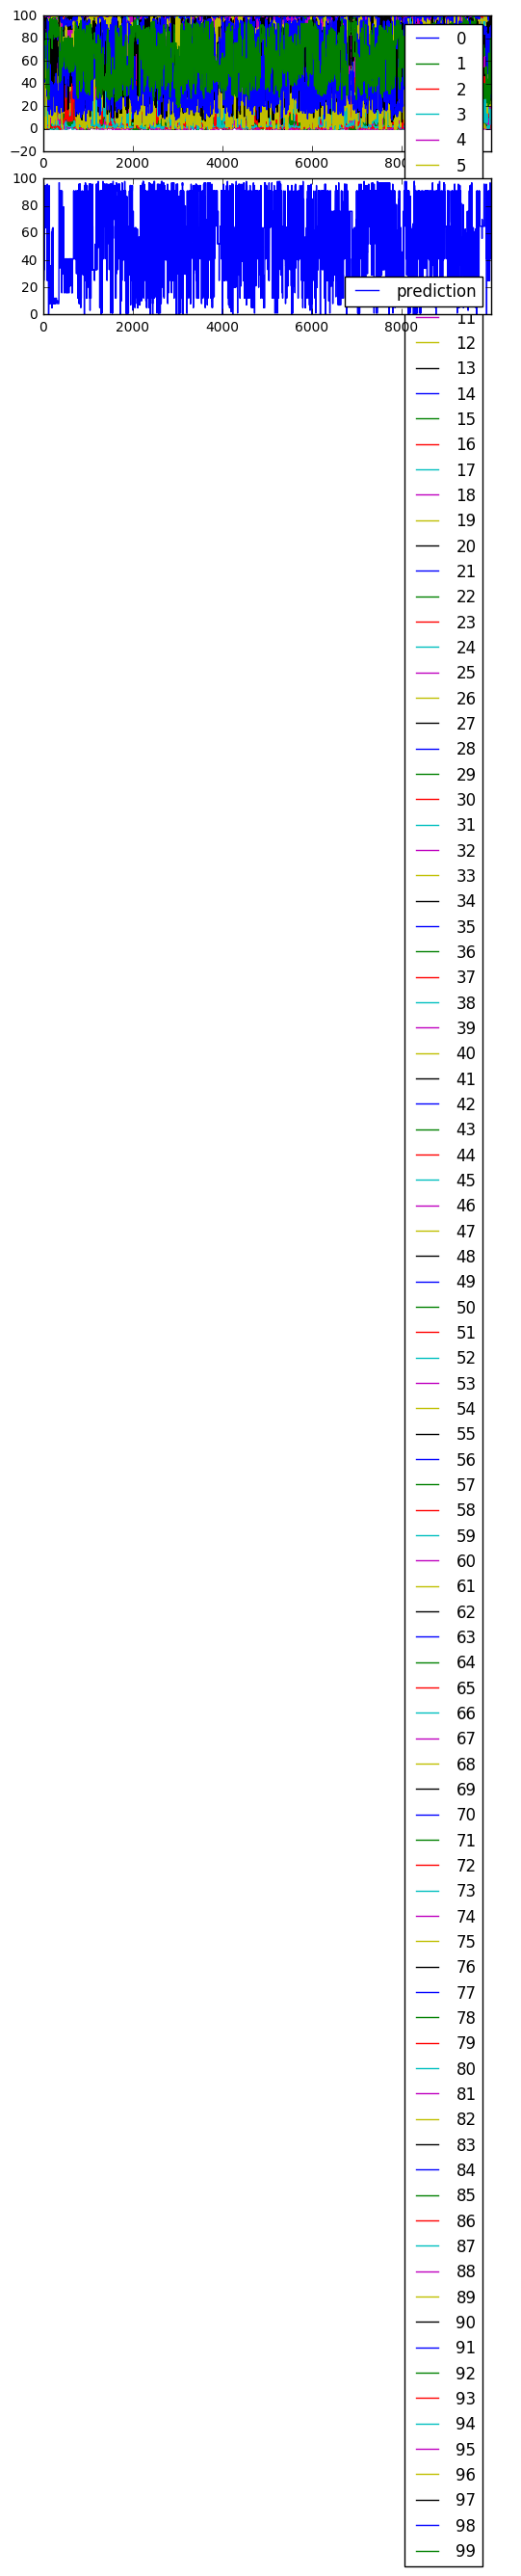

In [53]:
ax1 = plt.subplot(211)
pd.DataFrame(model3.decision_function(x)).plot(ax=ax1)
ax2 = plt.subplot(212)
pd.DataFrame(model3.predict(x), columns=['prediction']).plot(ax=ax2)
plt.show()

In [44]:
from sklearn.metrics import classification_report, accuracy_score

In [54]:
print classification_report(y, model3.predict(x))

             precision    recall  f1-score   support

          0       0.06      0.04      0.05        98
          1       0.23      0.44      0.31       112
          2       0.00      0.00      0.00        78
          3       0.17      0.02      0.04        51
          4       0.00      0.00      0.00        77
          5       0.10      0.05      0.07       120
          6       0.00      0.00      0.00       118
          7       0.10      0.07      0.08        86
          8       0.19      0.23      0.21       137
          9       0.00      0.00      0.00        94
         10       0.10      0.11      0.10       103
         11       0.00      0.00      0.00        68
         12       0.06      0.22      0.10       138
         13       0.24      0.11      0.15        90
         14       0.00      0.00      0.00        84
         15       0.00      0.00      0.00        87
         16       0.04      0.03      0.04       144
         17       0.00      0.00      0.00   

In [55]:
print accuracy_score(y, model3.predict(x))

0.0908
